In [1]:
import sys
print(sys.executable)
print(sys.prefix)

G:\GeekDS\venv\python.exe
G:\GeekDS\venv


# Algerian Forest Fires Dataset

### Data Set Information:

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

__122 instances for each region.__

- The period from June 2012 to September 2012. The dataset includes 11 attributes and 1 output attribute (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

- Attribute Information:

### Weather Data Observations

1. **Date**: 
   - **Format**: (DD/MM/YYYY) Day, month (June to September), year (2012)
   - **Significance**: Provides the specific day for each observation. This can be useful for time series analysis, identifying trends, or correlating with specific events.


2. **Temp (Temperature Noon)**: 
   - **Range**: 22 to 42°C
   - **Significance**: Represents the maximum temperature at noon. High temperatures can dry out fuels and increase the likelihood of fire ignition and spread.


3. **RH (Relative Humidity)**: 
   - **Range**: 21 to 90%
   - **Significance**: Indicates the amount of moisture in the air. Lower relative humidity can lead to drier conditions, making vegetation more flammable.


4. **Ws (Wind Speed)**: 
   - **Range**: 6 to 29 km/h
   - **Significance**: Wind speed can significantly influence fire behavior by spreading flames more quickly and providing more oxygen to the fire.


5. **Rain**: 
   - **Range**: 0 to 16.8 mm
   - **Significance**: Total rainfall for the day. Rain can dampen fuels and reduce the likelihood of fire, while a lack of rain can lead to drier conditions.


### Fire Weather Index (FWI) System Components

The FWI System is used to evaluate fire danger. It includes several components, each representing different aspects of fuel moisture and fire behavior.


6. **Fine Fuel Moisture Code (FFMC)**:
   - **Range**: 28.6 to 92.5
   - **Significance**: Indicates the moisture content of fine fuels (e.g., grasses, leaves). Higher values mean drier fuels, which are more flammable.


7. **Duff Moisture Code (DMC)**:
   - **Range**: 1.1 to 65.9
   - **Significance**: Reflects the moisture content in the duff layer (partially decomposed organic material). Higher values indicate drier conditions.


8. **Drought Code (DC)**:
   - **Range**: 7 to 220.4
   - **Significance**: Measures long-term drying and the moisture content of deeper organic layers. High values suggest prolonged dry conditions.


9. **Initial Spread Index (ISI)**:
   - **Range**: 0 to 18.5
   - **Significance**: Combines the effects of wind and FFMC on the rate of fire spread. Higher values indicate a faster spreading fire.


10. **Buildup Index (BUI)**:
    - **Range**: 1.1 to 68
    - **Significance**: Represents the total amount of fuel available for combustion, combining DMC and DC. Higher values indicate more fuel available for burning.


11. **Fire Weather Index (FWI)**:
    - **Range**: 0 to 31.1
    - **Significance**: The FWI is the final index and represents the overall fire danger rating. Higher values indicate a greater potential for severe fire behavior. It is a composite index derived from the ISI and BUI and is used to assess fire danger comprehensively.

### Classes

12. **Classes**: 
    - **Two Classes**: Fire and Not Fire
    - **Significance**: This is the target variable indicating whether a fire occurred (Fire) or not (Not Fire). It helps in classification tasks where you want to predict the likelihood of fire based on the other features.


### Interpretation of FWI

The Fire Weather Index (FWI) is your target variable. It integrates the effects of weather conditions and fuel moisture on fire potential. Here's how you can interpret it:


- **Low FWI (0-10)**: Low fire danger. Conditions are not conducive to fire ignition and spread.
- **Moderate FWI (10-20)**: Moderate fire danger. Fire ignition is possible, and spread may occur under favorable conditions.
- **High FWI (20-30)**: High fire danger. Fires can ignite easily and spread rapidly.
- **Extreme FWI (30+)**: Extreme fire danger. Fires are likely to be severe, spreading very quickly and being difficult to control.

By analyzing the FWI in conjunction with the other components and weather observations, you can assess the risk of fire on any given day. This can help in making informed decisions for fire prevention, preparedness, and response activities.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading the dataset
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' , header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.shape

(246, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Manipulation

In [7]:
#check for missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1. : "Bejaia Region Dataset"

2. : "Sidi-Bel Abbes Region Dataset"

__Add new column with region__

In [8]:
#seprating two regions
df.loc[:122,'Region']=0
df.loc[122: ,'Region']=1

In [9]:
data = df

In [10]:
data['Region'].value_counts()

Region
1.0    124
0.0    122
Name: count, dtype: int64

In [11]:
#changing region column type from "O" to "numeric(int)"
data['Region']=data[['Region']].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [13]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [14]:
#Removing the null Values
data = data.dropna().reset_index(drop=True)

In [15]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
#Because of two sperate dataset combined together this row showing header
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
#removing this row
data = data.drop(122).reset_index(drop=True)

In [18]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
#fix the column trailspaces
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
#change datatype of the columns as all are in "O" 
data[['month','day','year','Temperature','RH','Ws']] = data[['month','day','year','Temperature','RH','Ws']].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [23]:
objects = [features for features in data.columns if data[features].dtype == "O"]

In [24]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [25]:
#converting them in floats
for i in objects:
    if i != 'Classes':
        data[i] = data[i].astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [27]:
#now saving cleaned dataset
data.to_csv('Algerian_cleaned.csv' , index=False)

## Exploratory Data Analysis

In [28]:
#making copy of the data
df_copy=data.drop(['day','month','year'],axis=1)

In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df_copy.shape

(243, 12)

In [31]:
df_copy.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [32]:
#trial and back spaces issues - Have to use "str" accessor
df_copy.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [33]:
#using np.where clause
df_copy.Classes = np.where(df_copy.Classes.str.contains('not fire'),0,1)

In [34]:
df_copy.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

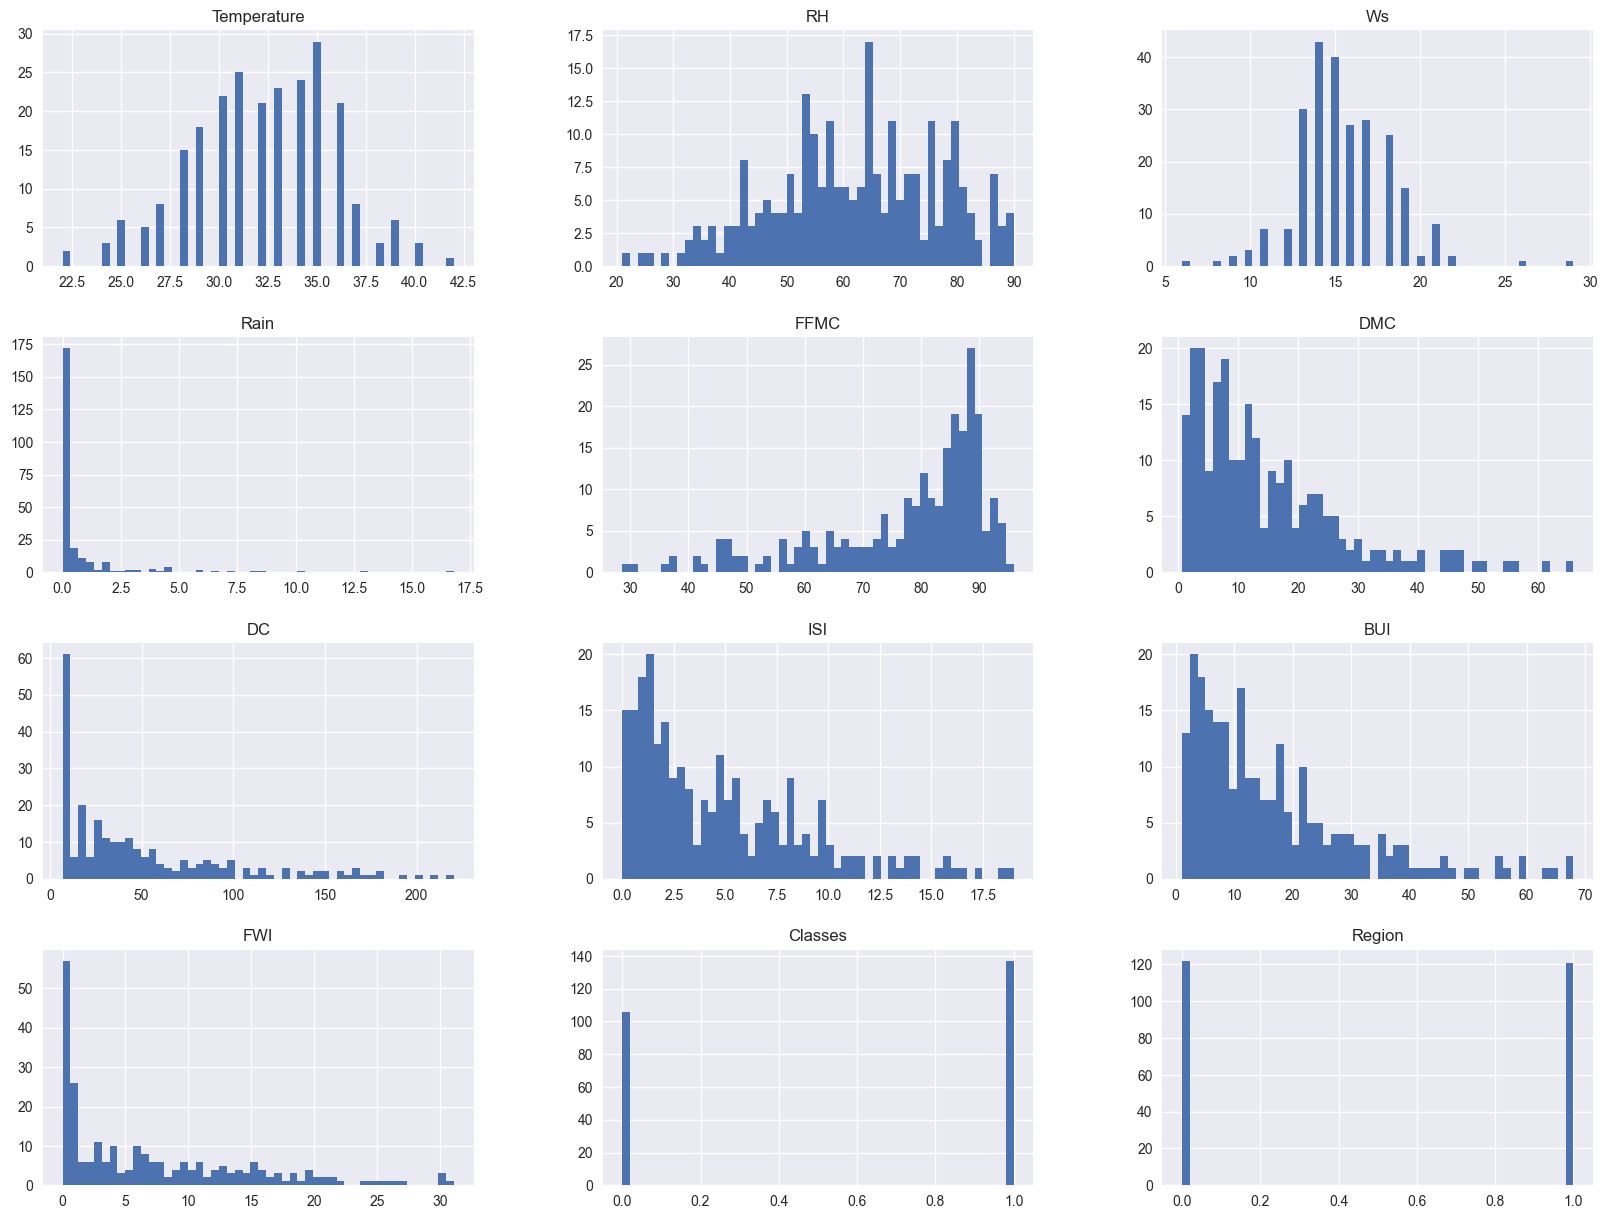

In [35]:
#Plotting the density plot
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50 , figsize=(20,15))
plt.show()

In [36]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [37]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [38]:
#percentage of Classes using Piechart
percent = df_copy.Classes.value_counts(normalize=True)*100
percent

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

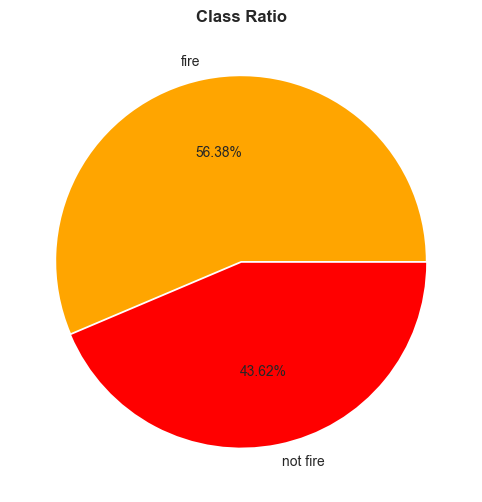

In [43]:
#plotting the graph
classlabels = ['fire' , 'not fire']
plt.figure(figsize=(10,6))
plt.pie(percent , labels=classlabels , autopct='%.2f%%' , colors=['orange','red'] , explode=(0,0.01))
plt.title('Class Ratio' , weight='bold')
plt.show()

In [44]:
#checking correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


# Observations

- `temp` is moderately correlated with `FWI`
- `Rain` is negatively correlated with `Temp`
- `FFMC` is highly correlated with `Temp`

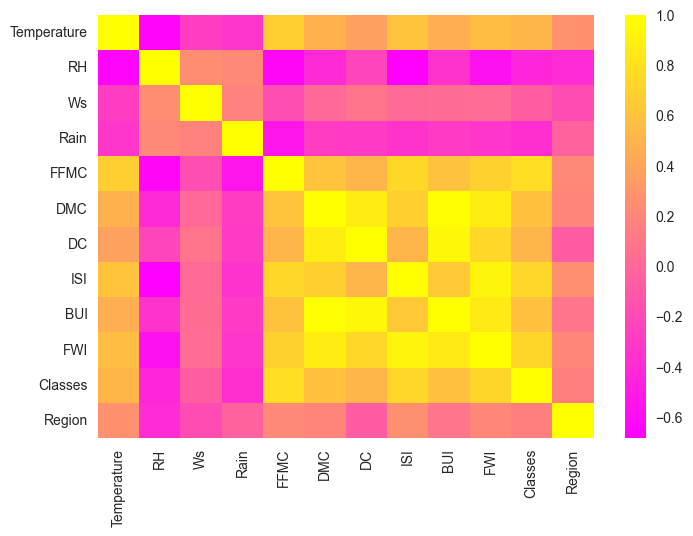

In [46]:
#plotting heatmap
sns.heatmap(df_copy.corr() , cmap='spring')
plt.show()

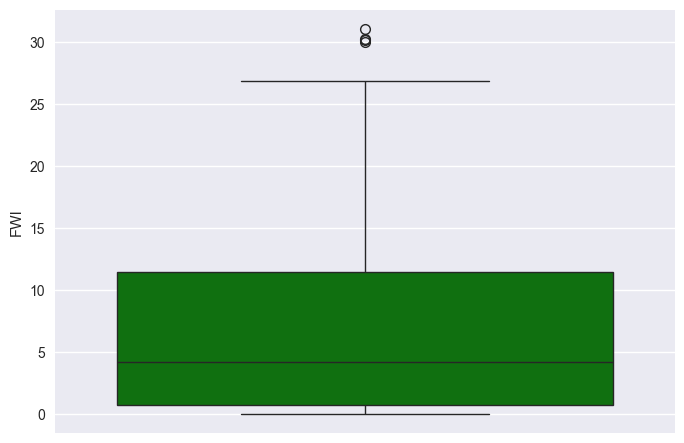

In [48]:
#plotting the boxplot
sns.boxplot(df_copy['FWI'] , color='g')
plt.show()

In [49]:
data['Classes'] = np.where(data.Classes.str.contains('not fire'),'not fire','fire')

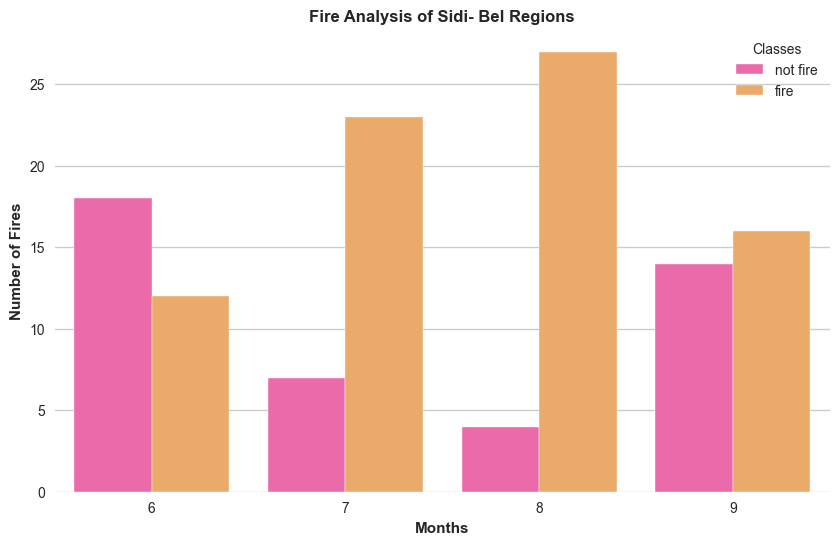

In [57]:
#Monthly Fire Analysis
dftemp = data.loc[data['Region']==1]

plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp , palette='spring')
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

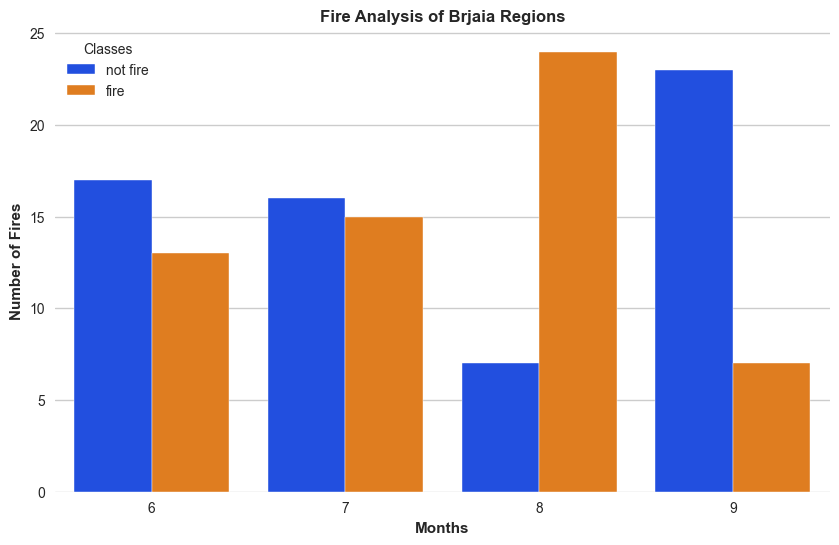

In [59]:
#Monthly Fire Analysis
dftemp1 = data.loc[data['Region']==0]

plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp1 , palette='bright')
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')
plt.show()

## Observations
- Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

- Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

- Less Fires was on September
